## Pyber Ride Sharing Analysis

- Not surprisingly, urban city types had the most drivers with 2,405, while Suburban and Rural cities had 490 and 78, respectively.
- Having found the average fare per city type, we can see that population density has a negative correlation with average fare. The cost of ride sharing in rural areas is relatively expensive.
- 68.4% of total rides occur in a city, whereas 26.3% take place in suburbs and 5.3% in rural areas.

***
## Bubble Plot of Ride Sharing Data

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load, low_memory=False)
ride_data_df = pd.read_csv(ride_data_to_load, low_memory=False)

# Combine the data into a single dataset
city_ride_merge_df = pd.merge(ride_data_df, city_data_df, on = 'city', how='left')
city_ride_df = city_ride_merge_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# show only those cities in an urban environment
u_mean_df = city_ride_df[city_ride_df.type == 'Urban']
# create df and drop ride_id
u_mean_df = u_mean_df.drop('ride_id',1)
# change column names
u_mean_df = u_mean_df.rename(columns={"fare": "avg_fare"})
# group by city then type, and find the mean for number values
u_mean_df = u_mean_df.groupby(['city','type']).mean()

# show only those cities in an urban environment
u_count_df = city_ride_df[city_ride_df.type == 'Urban']
# create df and drop ride_id
u_count_df = u_count_df.drop(['fare','driver_count','date'],1)
# change column names
u_count_df = u_count_df.rename(columns={"ride_id": "ride_count"})
# group by city then type, and find the mean for number values
u_count_df = u_count_df.groupby(['city','type']).count()

# combine into a single data frame
u_bubble_df = pd.merge(u_mean_df,u_count_df, on = ['city', 'type'])

u_bubble_df.head(10)

,,avg_fare,driver_count,ride_count
city,type,,,
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Carriemouth,Urban,28.314444,52,27
Christopherfurt,Urban,24.501852,41,27
Deanville,Urban,25.842632,49,19
East Kaylahaven,Urban,23.757931,65,29
Erikaland,Urban,24.906667,37,12
Grahamburgh,Urban,25.221200,61,25
Huntermouth,Urban,28.993750,37,24


In [3]:
# show only those cities in an urban environment
s_mean_df = city_ride_df[city_ride_df.type == 'Suburban']
# create df and drop ride_id
s_mean_df = s_mean_df.drop('ride_id',1)
# change column names
s_mean_df = s_mean_df.rename(columns={"fare": "avg_fare"})
# group by city then type, and find the mean for number values
s_mean_df = s_mean_df.groupby(['city','type']).mean()

# show only those cities in an urban environment
s_count_df = city_ride_df[city_ride_df.type == 'Suburban']
# create df and drop ride_id
s_count_df = s_count_df.drop(['fare','driver_count','date'],1)
# change column names
s_count_df = s_count_df.rename(columns={"ride_id": "ride_count"})
# group by city then type, and find the mean for number values
s_count_df = s_count_df.groupby(['city','type']).count()

# combine into a single data frame
s_bubble_df = pd.merge(s_mean_df,s_count_df, on = ['city', 'type'])

s_bubble_df.head(10)

,,avg_fare,driver_count,ride_count
city,type,,,
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Brandonfort,Suburban,35.437368,10,19
Colemanland,Suburban,30.894545,23,22
Davidfurt,Suburban,31.995882,23,17
East Aaronbury,Suburban,25.661111,7,9
East Danielview,Suburban,31.560588,22,17
East Kentstad,Suburban,29.823077,20,13
East Marymouth,Suburban,30.835185,5,27


In [4]:
# show only those cities in an urban environment
r_mean_df = city_ride_df[city_ride_df.type == 'Rural']
# create df and drop ride_id
r_mean_df = r_mean_df.drop('ride_id',1)
# change column names
r_mean_df = r_mean_df.rename(columns={"fare": "avg_fare"})
# group by city then type, and find the mean for number values
r_mean_df = r_mean_df.groupby(['city','type']).mean()

# show only those cities in an urban environment
r_count_df = city_ride_df[city_ride_df.type == 'Rural']
# create df and drop ride_id
r_count_df = r_count_df.drop(['fare','driver_count','date'],1)
# change column names
r_count_df = r_count_df.rename(columns={"ride_id": "ride_count"})
# group by city then type, and find the mean for number values
r_count_df = r_count_df.groupby(['city','type']).count()

# combine into a single data frame
r_bubble_df = pd.merge(r_mean_df,r_count_df, on = ['city', 'type'])

r_bubble_df.head(10)

,,avg_fare,driver_count,ride_count
city,type,,,
Bradshawfurt,Rural,40.064000,7,10
Garzaport,Rural,24.123333,7,3
Harringtonfort,Rural,33.470000,4,6
Jessicaport,Rural,36.013333,1,6
Lake Jamie,Rural,34.358333,4,6
Lake Latoyabury,Rural,26.061818,2,11
Michaelberg,Rural,34.997500,6,12
New Ryantown,Rural,43.278333,2,6
Newtonview,Rural,36.745000,1,4


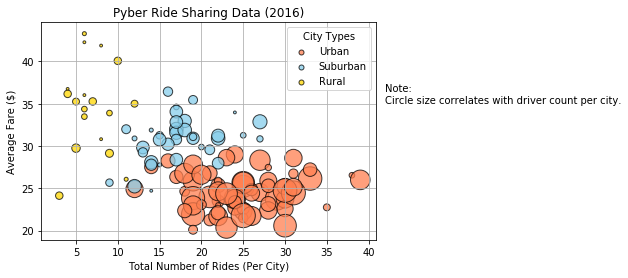

In [5]:
# Obtain the x and y coordinates for each of the three city types
u_x = u_bubble_df.ride_count
u_y = u_bubble_df.avg_fare
u_s = u_bubble_df.driver_count * 8
u_c = 'coral'

s_x = s_bubble_df.ride_count
s_y = s_bubble_df.avg_fare
s_s = s_bubble_df.driver_count * 8
s_c = 'skyblue'

r_x = r_bubble_df.ride_count
r_y = r_bubble_df.avg_fare
r_s = r_bubble_df.driver_count * 8
r_c = 'gold'
# Build the scatter plots for each city types
plt.scatter(u_x,
            u_y,
            u_s,
            alpha = .75,
            c = u_c,
            linewidths=1,
            edgecolors='black',
            label = 'Urban')

plt.scatter(s_x,
            s_y,
            s_s,
            alpha = .75,
            c = s_c,
            linewidths=1,
            edgecolors='black',
            label = 'Suburban')

plt.scatter(r_x,
            r_y,
            r_s,
            alpha = .75,
            c = r_c,
            linewidths=1,
            edgecolors='black',
            label = 'Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create a legend
legend = pylab.legend(loc='upper right', title = "City Types")
for handle in legend.legendHandles:
    handle.set_sizes([25.0])

# Incorporate a text label regarding circle size
plt.figtext(.922,.60, 'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("Pyber_Scatterplot.png", bbox_inches = 'tight')

#Display Figure
plt.show()

***
## Total Fares by City Type

In [6]:
# Calculate Type Percents
total_fares_df = city_ride_df[['type','fare']]
total_fares_df = total_fares_df.groupby('type').sum()
total_fares_df = total_fares_df.reset_index(level=None, drop=False, inplace=False, col_level=0)
total_fares_df

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


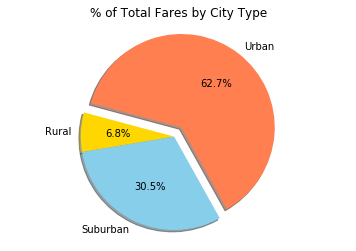

In [7]:
city_type = total_fares_df['type']
fare_count = total_fares_df['fare']
explode = (0, 0, 0.125)
# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(fare_count, explode = explode, labels = city_type, autopct = '%1.1f%%', shadow = True, startangle = 165, colors = [r_c, s_c, u_c])
ax1.axis('equal')

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFares_byCityType_Pie.png")

#Display Figure
plt.show()

***
## Total Rides by City Type

In [8]:
# Calculate Ride Percents
total_rides_df = city_ride_df[['type','ride_id']]
total_rides_df = total_rides_df.groupby('type').count()
total_rides_df = total_rides_df.reset_index(level=None, drop=False, inplace=False, col_level=0)
total_rides_df

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


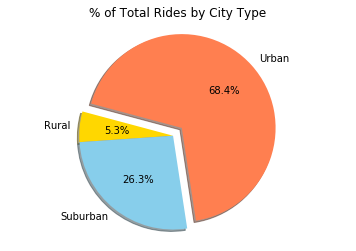

In [9]:
# Build Pie Chart
city_type = total_rides_df['type']
ride_count = total_rides_df['ride_id']
explode = (0, 0, 0.125)
# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(ride_count, explode = explode, labels = city_type, autopct = '%1.1f%%', shadow = True, startangle = 165, colors = [r_c, s_c, u_c])
ax1.axis('equal')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRides_byCityType_Pie.png")

#Display Figure
plt.show()

***
## Total Drivers by City Type

In [10]:
# Calculate Driver Percents
total_drivers_df = city_data_df
# create df and drop ride_id
total_drivers_df = total_drivers_df.drop(['city'],1)
# group by city then type, and find the mean for number values
total_drivers_df = total_drivers_df.groupby(['type']).sum()
total_drivers_df = total_drivers_df.reset_index(level=None, drop=False, inplace=False, col_level=0)


print(total_drivers_df)

       type  driver_count
0     Rural            78
1  Suburban           490
2     Urban          2405


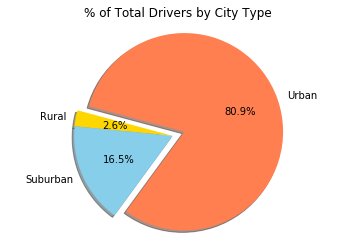

In [11]:
# Build Pie Charts
city_type = total_drivers_df['type']
driver_count = total_drivers_df['driver_count']
explode = (0, 0, 0.125)
# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(driver_count, explode = explode, labels = city_type, autopct = '%1.1f%%', shadow = True, startangle = 165, colors = [r_c, s_c, u_c])
ax1.axis('equal')

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDrivers_byCityType_Pie.png")

#Display Figure
plt.show()